<a href="https://colab.research.google.com/github/Kiroxs/ProyectoML/blob/main/Proyecto_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión de datos misteriosos
####Alvaro Herrera

##Hipótesis

*La aplicación de técnicas de preprocesamiento, como el escalamiento de datos, mitiga el impacto de valores atípicos en modelos de machine learning. Al evaluar el rendimiento, se utilizarán métricas como R^2, MSE y RMSE.*

*Se implementarán modelos de regresión SVM y Random Forest. Se espera que Random Forest supere a SVM debido a su capacidad para manejar relaciones no lineales y la complejidad del conjunto de datos.*

##Datos

Se obtienen los datos entregados por el profesor y se utilizan 2 DataFrames



*   df = datos que van a ser escalados
*   df2 = datos que no se van a escalar





In [62]:
!pip install pandas
import pandas as pd

In [63]:

url = 'https://docs.google.com/spreadsheets/d/1cJZIUTPoYliSej8ZQumPdrvWjcZeRyuEqyC4JyXpx-8/export?format=csv'
df = pd.read_csv(url)
df2 = pd.read_csv(url)
df.head()
df.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,-2.202857,944.769524,948.315714,947.214762,946.506429,947.941905,948.023810,946.536190,946.219524,947.187619,...,3.696905,3.921667,4.088095,3.906905,3.959524,3.878095,3.772143,4.223095,3.875476,4.156429
std,1.701693,1.952447,2.000142,2.012698,1.984637,1.950696,2.045033,2.023736,2.009098,2.108543,...,0.040754,0.042879,0.037885,0.039478,0.039383,0.032478,0.038732,0.046407,0.043348,0.048025
min,-5.400000,941.410000,944.510000,943.460000,943.340000,944.350000,944.480000,942.920000,943.060000,943.570000,...,3.620000,3.810000,3.990000,3.820000,3.860000,3.820000,3.680000,4.080000,3.790000,4.060000
25%,-3.550000,943.217500,946.700000,945.627500,944.955000,946.360000,946.442500,944.862500,944.615000,945.567500,...,3.660000,3.890000,4.050000,3.882500,3.940000,3.852500,3.750000,4.200000,3.832500,4.110000
50%,-2.300000,943.990000,947.615000,946.485000,945.815000,947.210000,947.285000,945.845000,945.405000,946.315000,...,3.710000,3.930000,4.085000,3.920000,3.970000,3.885000,3.790000,4.230000,3.895000,4.170000
75%,-1.025000,946.537500,950.172500,949.027500,948.315000,949.675000,949.882500,948.352500,948.082500,949.122500,...,3.720000,3.950000,4.110000,3.930000,3.980000,3.900000,3.790000,4.250000,3.900000,4.190000
max,0.700000,948.090000,951.620000,950.710000,949.700000,951.060000,951.500000,950.090000,949.820000,950.590000,...,3.770000,4.000000,4.160000,3.970000,4.020000,3.940000,3.840000,4.320000,3.940000,4.240000


Gráfico para estudiar de manera visual el comportamiendo de la variable objetivo

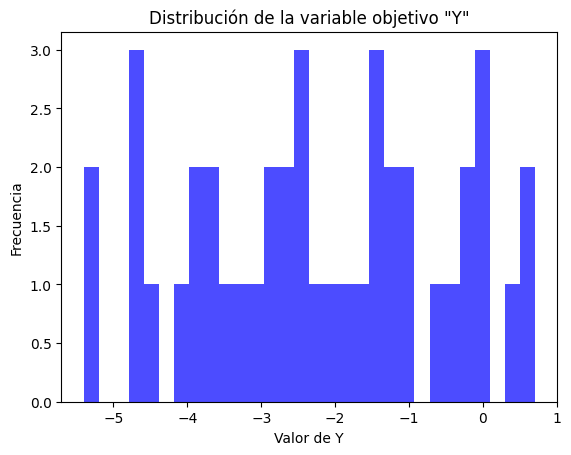

In [64]:
import matplotlib.pyplot as plt

plt.hist(df['Y'], bins=30, color='blue', alpha=0.7)
plt.title('Distribución de la variable objetivo "Y"')
plt.xlabel('Valor de Y')
plt.ylabel('Frecuencia')
plt.show()

In [65]:
y=df['Y']
df.drop('Y', axis=1, inplace=True)


## Pre-procesamiento de los Datos

###Detección de datos faltantes

Una forma de detectar datos faltes es recorrer el dataset buscando datos null

In [ ]:
nulls = df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Comprobación de manera visual

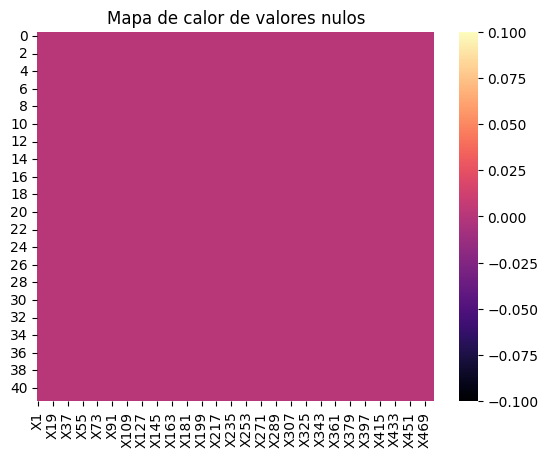

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=True, cmap='magma')
plt.title('Mapa de calor de valores nulos')
plt.show()


Como muestra el fragmento de código y el mapa de calor, no existe datos faltantes.

###Detección de datos atípicos

Realmente al no conocer la procedencia de los datos es bastante complicado detectar datos átipicos, una forma de detectar los mismos es de manera visual mediante un boxplot general, con el fin de ver las diferencias, aunque no se va a realizar ningún proceso además del escalado y la reducción de la dimensionalidad en el DataFrame *df* que busque mitigar el efecto de esta categoría de datos.

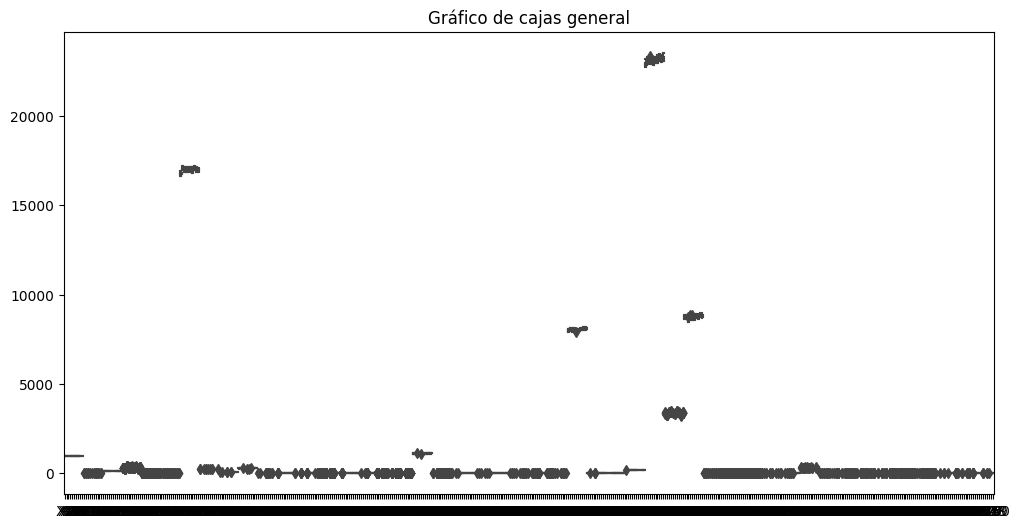

In [68]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(df)
plt.title('Gráfico de cajas general')
plt.show()


##Visualización y Reducción de la Dimensionalidad

En esta parte del proceso, se realizaran un escalado en los conjuntos de entrenamiento y prueba del DataFrame *df*

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
scaled_X_train = scale(X_train)
scaled_X_test = scale(X_test)
scaled_df_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_df_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)
print("Conjunto de entrenamiento escalado:")
print(scaled_df_train.head())

print("\nConjunto de prueba escalado:")
print(scaled_df_test.head())

Conjunto de entrenamiento escalado:
         X1        X2        X3        X4        X5        X6        X7  \
0  0.956075  0.984333  0.948174  0.976077  0.946648  0.965017  0.932226   
1  1.516589  1.519940  1.403088  1.587503  1.528648  1.339249  1.505363   
2 -0.412873 -0.249664 -0.327678 -0.236233 -0.546074 -0.208942 -0.219209   
3 -0.833259 -0.843032 -0.829652 -0.742240 -0.799352 -0.654944 -0.843979   
4 -1.140464 -1.047823 -1.023121 -0.852930 -1.090352 -1.152210 -1.066005   

         X8        X9       X10  ...      X471      X472      X473      X474  \
0  0.942055  0.967440  0.857514  ...  0.621335  0.780256  0.600023  0.662357   
1  1.432317  1.481809  1.637965  ...  1.399970  1.584895  1.173957  1.482024   
2 -0.389395 -0.348158 -0.384836  ... -0.416845  0.243830 -0.260879  0.389135   
3 -0.647428 -0.857582 -0.682150  ... -1.974115 -0.292596 -1.408749 -0.157310   
4 -1.323474 -1.050470 -1.351108  ... -1.195480 -1.633660 -0.547847 -1.250199   

       X475      X476      X477 

Uso del PCA con el fin de reducir la cantidad de dimensiones a 25, las cuales expliquen al menos un 95% de los totales

[0.33677098 0.21028704 0.08528533 0.05697686 0.04907451 0.03624621
 0.02741211 0.02280376 0.02018906 0.01828834 0.01623925 0.01395085
 0.01243447 0.01129846 0.00990545 0.0092384  0.00766553 0.00716163
 0.0067316  0.00599957 0.00511553 0.00463483 0.00453668 0.00408135
 0.00370877]
[0.33677098 0.54705802 0.63234335 0.68932021 0.73839471 0.77464092
 0.80205303 0.82485679 0.84504585 0.86333419 0.87957344 0.89352428
 0.90595875 0.91725721 0.92716266 0.93640106 0.94406659 0.95122822
 0.95795983 0.9639594  0.96907493 0.97370975 0.97824644 0.98232779
 0.98603656]


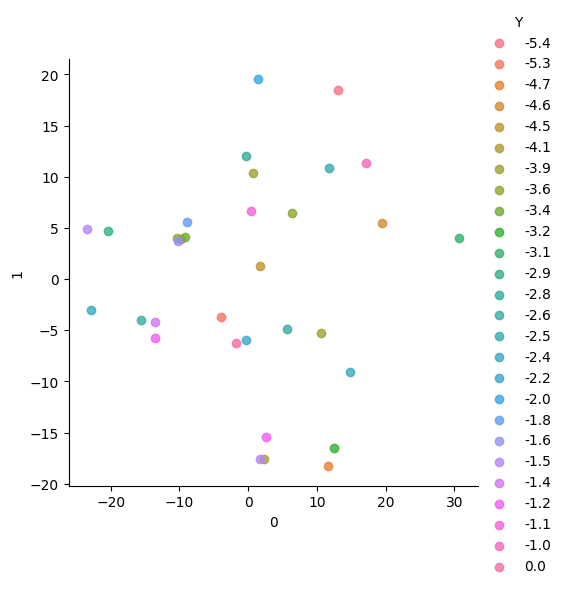

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

n_components = 25
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_X_train)
pca_df = pd.DataFrame(X_pca)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
pca_df.columns = pca_df.columns.astype(str)
pca_df['Y']=y
sns.lmplot(x="0", y="1", data=pca_df, hue='Y', fit_reg=False)
plt.show()

##Regresiones

Para este apartado se utilizarán dos algormitos de regresión: support vector machine(SVM) y Random Forest (rf), tanto en el DataFrame *df* como en el *df2*, acompañados de sus respectivas métricas: **R-cuadrado ,Standard Error, Mean Squared Error y Root Mean Squared Erro**r

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR

from math import sqrt

###SVM *df* (DataFrame escalado)

In [72]:
svm_model = SVR(kernel='rbf', C=1)
svm_model.fit(scaled_X_train, y_train)
y_pred = svm_model.predict(scaled_X_test)
r2_svme = r2_score(y_test, y_pred)
se_svme = sqrt(mean_squared_error(y_test, y_pred))
mse_svme = mean_squared_error(y_test, y_pred)
rmse_svme = sqrt(mse_svme)
print(f'R-cuadrado: {r2_svme}')
print(f'Standard Error (SE): {se_svme}')
print(f'Mean Squared Error (MSE): {mse_svme}')
print(f'Root Mean Squared Error (RMSE): {rmse_svme}')

R-cuadrado: 0.6247428962508872
Standard Error (SE): 0.8975254403347548
Mean Squared Error (MSE): 0.8055519160480954
Root Mean Squared Error (RMSE): 0.8975254403347548


Representación Gráfica

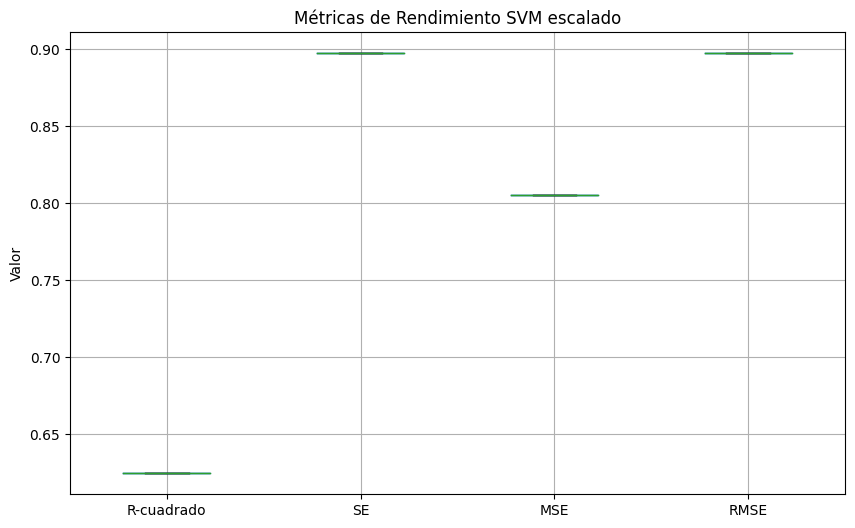

In [73]:
import matplotlib.pyplot as plt

metrics_df_e = pd.DataFrame({'R-cuadrado': [r2_svme], 'SE': [se_svme], 'MSE': [mse_svme], 'RMSE': [rmse_svme ]})

plt.figure(figsize=(10, 6))
metrics_df_e.boxplot()
plt.title('Métricas de Rendimiento SVM escalado')
plt.ylabel('Valor')
plt.show()

###Random Forest *df* (DataFrame escalado)

In [74]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(scaled_X_train, y_train)
y_pred_rf = rf_model.predict(scaled_X_test)
r2_rf = r2_score(y_test, y_pred_rf)
se_rf = sqrt(mean_squared_error(y_test, y_pred_rf))
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
print("Resultados para Random Forest:")
print(f'R-cuadrado: {r2_rf}')
print(f'Standard Error (SE): {se_rf}')
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')

Resultados para Random Forest:
R-cuadrado: 0.5935941113871647
Standard Error (SE): 0.9340331761892722
Mean Squared Error (MSE): 0.8724179742222199
Root Mean Squared Error (RMSE): 0.9340331761892722


Representación Gráfica

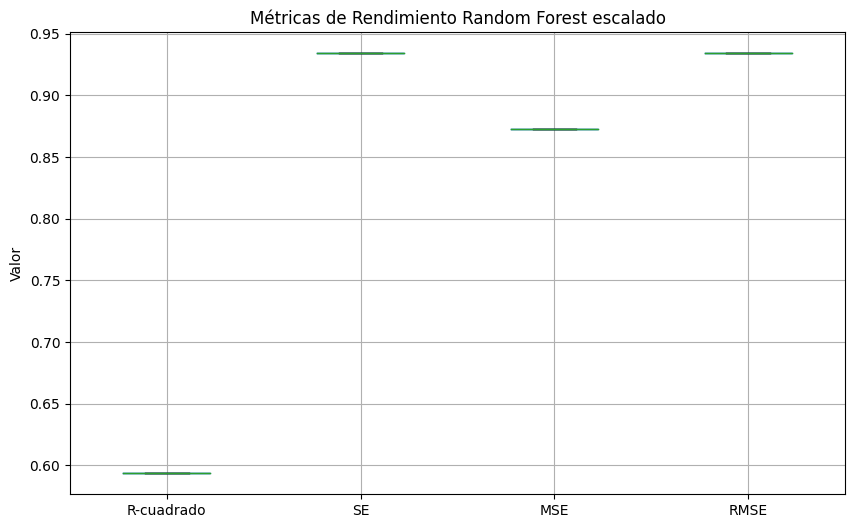

In [75]:
import matplotlib.pyplot as plt
metrics_rf_e = pd.DataFrame({'R-cuadrado': [r2_rf], 'SE': [se_rf], 'MSE': [mse_rf], 'RMSE': [rmse_rf ]})
plt.figure(figsize=(10, 6))
metrics_rf_e.boxplot()
plt.title('Métricas de Rendimiento Random Forest escalado')
plt.ylabel('Valor')
plt.show()

###SVM *df2* (DataFrame  NO escalado)

In [76]:
X = df2.drop('Y', axis=1)
y = df2['Y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVR(kernel='rbf', C=20)
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
r2_svmn = r2_score(y_test, predictions)
se_svmn = sqrt(mean_squared_error(y_test, predictions))
rmse_svmn = sqrt(se_svmn)
mse_svmn = mean_squared_error(y_test, predictions)

print(f'R-cuadrado: {r2_svmn}')
print(f'Standard Error (SE): {se_svmn}')
print(f'Mean Squared Error (MSE): {mse_svmn}')
print(f'Root Mean Squared Error (RMSE): {rmse_svmn}')

R-cuadrado: 0.009556571721550333
Standard Error (SE): 1.458133016121782
Mean Squared Error (MSE): 2.126151892704405
Root Mean Squared Error (RMSE): 1.2075317867956032


Representación Gráfica

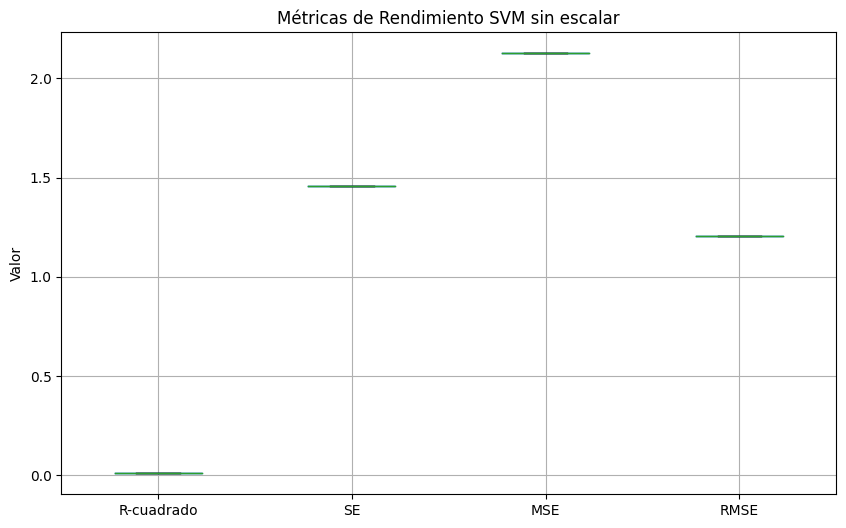

In [77]:
import matplotlib.pyplot as plt
metrics_df2_sn = pd.DataFrame({'R-cuadrado': [r2_svmn], 'SE': [se_svmn], 'MSE': [mse_svmn], 'RMSE': [rmse_svmn]})
plt.figure(figsize=(10, 6))
metrics_df2_sn.boxplot()
plt.title('Métricas de Rendimiento SVM sin escalar')
plt.ylabel('Valor')
plt.show()

###Random Forest *df2* (DataFrame NO escalado)

In [78]:
X = df2.drop('Y', axis=1)
y = df2['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
r2_rfsn = r2_score(y_test, predictions)
se_rfsn = sqrt(mean_squared_error(y_test, predictions))
rmse_rfsn = sqrt(se_rfsn)
mse_rfsn = mean_squared_error(y_test, predictions)
print(f'R-cuadrado: {r2_rfsn}')
print(f'Standard Error (SE): {se_rfsn}')
print(f'Mean Squared Error (MSE): {(mse_rfsn)}')
print(f'Root Mean Squared Error (RMSE): {rmse_rfsn}')


R-cuadrado: 0.5839366496066254
Standard Error (SE): 0.945065778404398
Mean Squared Error (MSE): 0.8931493255111107
Root Mean Squared Error (RMSE): 0.9721449369329648


Representación Gráfica

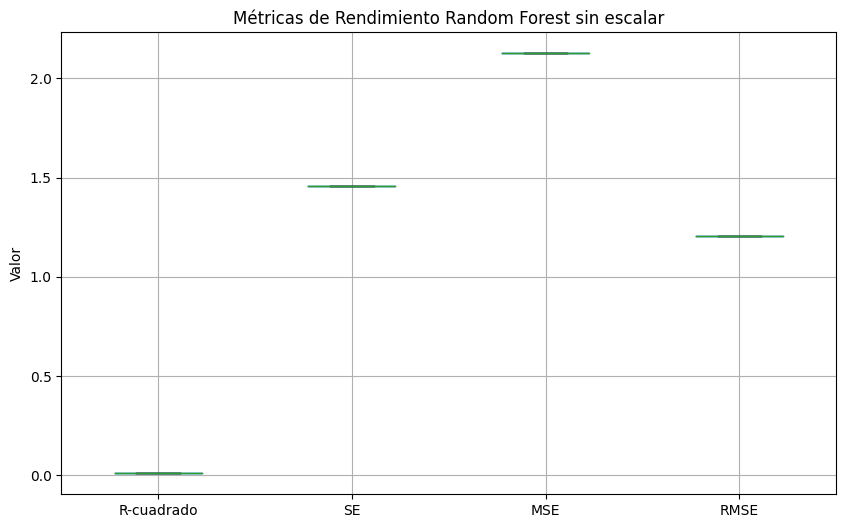

In [79]:
import matplotlib.pyplot as plt

metrics_rf_sn = pd.DataFrame({'R-cuadrado': [r2_rfsn], 'SE': [se_rfsn], 'MSE': [mse_rfsn], 'RMSE': [rmse_rfsn ]})
plt.figure(figsize=(10, 6))
metrics_df2_sn.boxplot()
plt.title('Métricas de Rendimiento Random Forest sin escalar')
plt.ylabel('Valor')
plt.show()

##Validaciones y Resultados


Para validar las metricas obtenidas se hizo uso del modelo de validación cruzada de 10 subconjuntos

In [80]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np

###Validación SVM escalado

In [81]:
X = pca_df[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']]
y = pca_df['Y']
svm_regressor = SVR(kernel='rbf', C=20)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring = {
    'r2': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
}
r2_scores_svm = cross_val_score(svm_regressor, X, y, cv=kf, scoring=scoring['r2'])
mse_scores_svm = cross_val_score(svm_regressor, X, y, cv=kf, scoring=scoring['mse'])
rmse_scores_svm = cross_val_score(svm_regressor, X, y, cv=kf, scoring=scoring['rmse'])
r2_mean_svm, r2_std_svm = np.mean(r2_scores_svm), np.std(r2_scores_svm)
mse_mean_svm, mse_std_svm = np.mean(mse_scores_svm), np.std(mse_scores_svm)
rmse_mean_svm, rmse_std_svm = np.mean(rmse_scores_svm), np.std(rmse_scores_svm)

print(f'R^2 (CV - SVM): Mean={r2_mean_svm:.4f}, Std={r2_std_svm:.4f}')
print(f'Mean Squared Error (MSE) (CV - SVM): Mean={mse_mean_svm:.4f}, Std={mse_std_svm:.4f}')
print(f'Root Mean Squared Error (RMSE) (CV - SVM): Mean={rmse_mean_svm:.4f}, Std={rmse_std_svm:.4f}')




R^2 (CV - SVM): Mean=-2.1201, Std=2.5847
Mean Squared Error (MSE) (CV - SVM): Mean=2.8085, Std=1.7471
Root Mean Squared Error (RMSE) (CV - SVM): Mean=1.5897, Std=0.5306


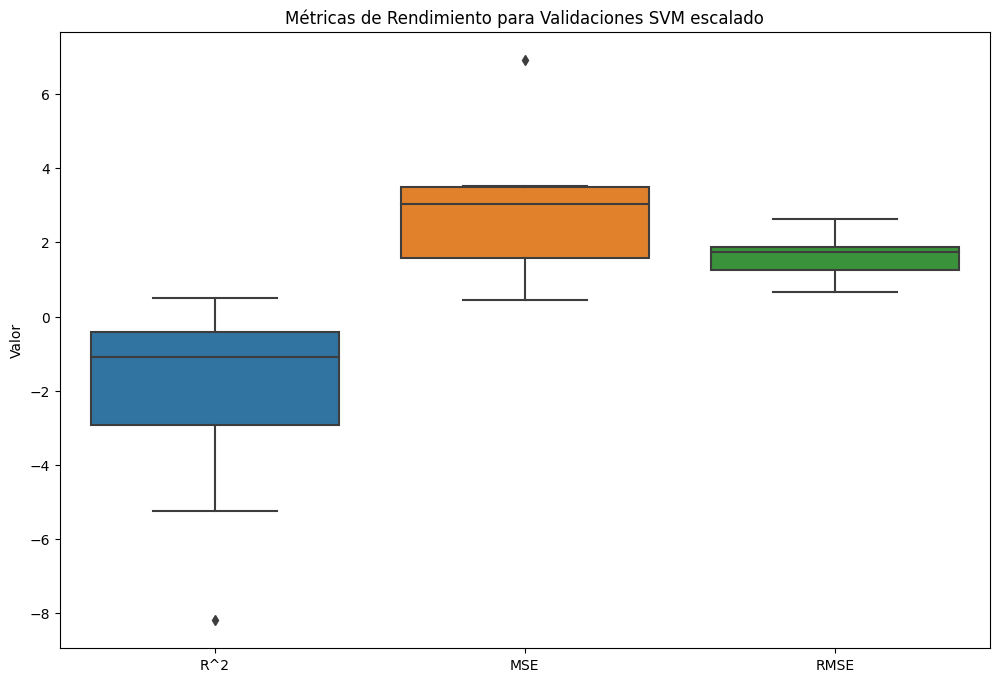

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


results_df_svm = pd.DataFrame({
    'R^2': r2_scores_svm,
    'MSE': mse_scores_svm,
    'RMSE': rmse_scores_svm
})
plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df_svm)
plt.title('Métricas de Rendimiento para Validaciones SVM escalado')
plt.ylabel('Valor')
plt.show()


###Validación Random Forest escalado

In [83]:
X = pca_df[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']]
y = pca_df['Y']


rf_regressor = RandomForestRegressor(n_estimators=500, random_state=42)


kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring = {
    'r2': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
}

r2_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring=scoring['r2'])
mse_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring=scoring['mse'])
rmse_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring=scoring['rmse'])





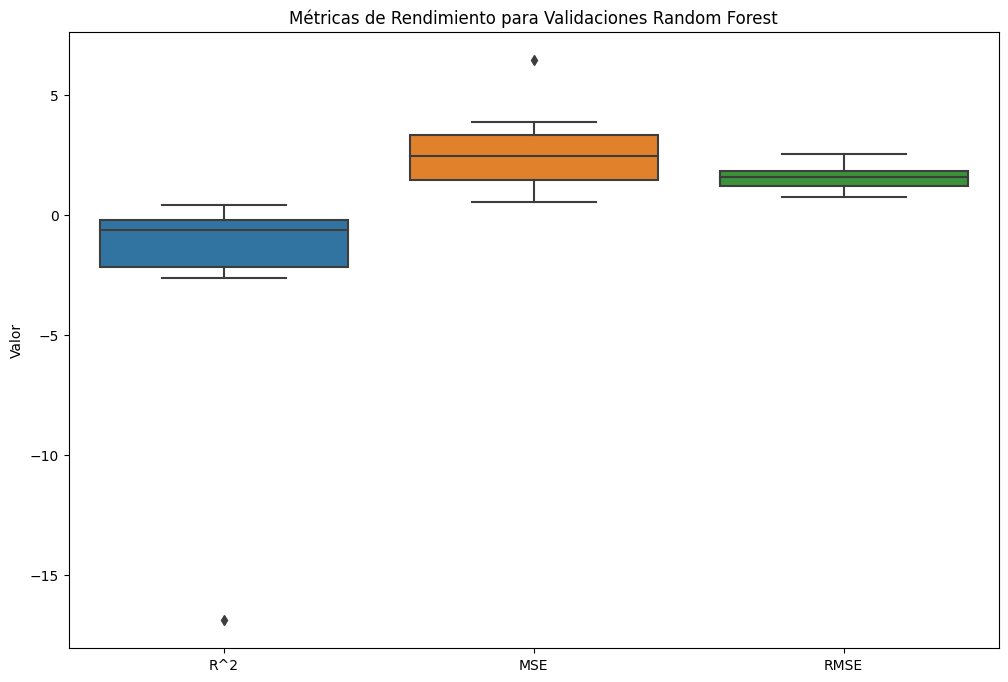

In [84]:
results_df_rf = pd.DataFrame({
    'R^2': r2_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores
})

plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df_rf)
plt.title('Métricas de Rendimiento para Validaciones Random Forest')
plt.ylabel('Valor')
plt.show()


###Validación SVM vs Random Forest escalado

Representación gráfica y tabla comparativa

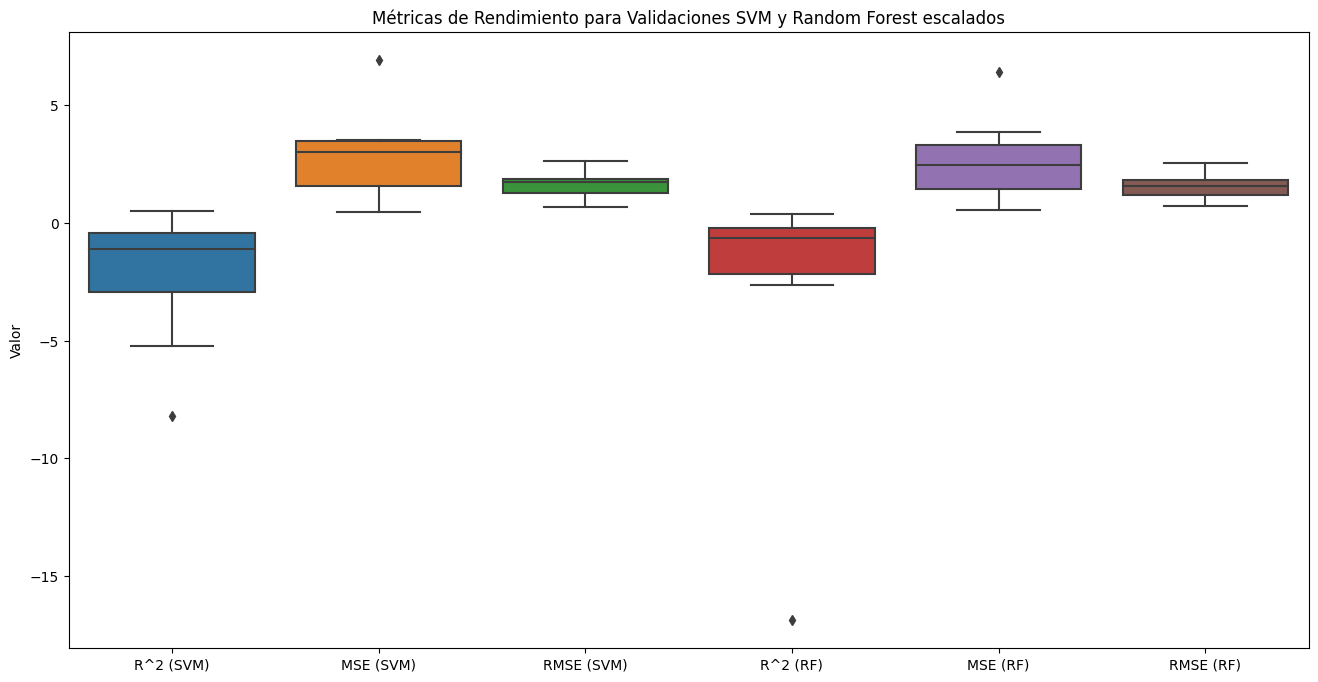

Tabla de Resumen de Métricas SVM:
            Promedio SVM  Desviación Estándar SVM
R^2 (SVM)        -2.1201                   2.7245
MSE (SVM)         2.8085                   1.8417
RMSE (SVM)        1.5897                   0.5593

Tabla de Resumen de Métricas Random Forest:
           Promedio RF  Desviación Estándar RF
R^2 (RF)       -2.4846                  5.1572
MSE (RF)        2.6141                  1.7636
RMSE (RF)       1.5275                  0.5587


In [85]:


results_df_svm = pd.DataFrame({
    'R^2 (SVM)': r2_scores_svm,
    'MSE (SVM)': mse_scores_svm,
    'RMSE (SVM)': rmse_scores_svm  #
})
results_df_rf = pd.DataFrame({
    'R^2 (RF)': r2_scores,
    'MSE (RF)': mse_scores,
    'RMSE (RF)': rmse_scores
})
combined_results_df = pd.concat([results_df_svm, results_df_rf], axis=1)
plt.figure(figsize=(16, 8))
sns.boxplot(data=combined_results_df)
plt.title('Métricas de Rendimiento para Validaciones SVM y Random Forest escalados')
plt.ylabel('Valor')
plt.show()
mean_values_svm = results_df_svm.mean()
std_values_svm = results_df_svm.std()
summary_table_svm = pd.DataFrame({
    'Promedio SVM': mean_values_svm,
    'Desviación Estándar SVM': std_values_svm
})
summary_table_svm = summary_table_svm.round(4)

mean_values_rf = results_df_rf.mean()
std_values_rf = results_df_rf.std()
summary_table_rf = pd.DataFrame({
    'Promedio RF': mean_values_rf,
    'Desviación Estándar RF': std_values_rf
})
summary_table_rf = summary_table_rf.round(4)

print("Tabla de Resumen de Métricas SVM:")
print(summary_table_svm)

print("\nTabla de Resumen de Métricas Random Forest:")
print(summary_table_rf)


###Validación SVM no escalado

In [86]:
X = df2.drop('Y', axis=1)
y = df2['Y']


svm_model = SVR(kernel='rbf', C=20)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring = {
    'r2': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: sqrt(mean_squared_error(y_true, y_pred)))
}
r2_scores_svm = cross_val_score(svm_model, X, y, cv=kf, scoring=scoring['r2'])
mse_scores_svm = cross_val_score(svm_model, X, y, cv=kf, scoring=scoring['mse'])
rmse_scores_svm = cross_val_score(svm_model, X, y, cv=kf, scoring=scoring['rmse'])
r2_mean_svm, r2_std_svm = np.mean(r2_scores_svm), np.std(r2_scores_svm)
mse_mean_svm, mse_std_svm = np.mean(mse_scores_svm), np.std(mse_scores_svm)
rmse_mean_svm, rmse_std_svm = np.mean(rmse_scores_svm), np.std(rmse_scores_svm)
print(f'R^2 (CV - SVM): Mean={r2_mean_svm:.4f}, Std={r2_std_svm:.4f}')
print(f'Mean Squared Error (MSE) (CV - SVM): Mean={mse_mean_svm:.4f}, Std={mse_std_svm:.4f}')
print(f'Root Mean Squared Error (RMSE) (CV - SVM): Mean={rmse_mean_svm:.4f}, Std={rmse_std_svm:.4f}')

R^2 (CV - SVM): Mean=-0.3692, Std=0.6156
Mean Squared Error (MSE) (CV - SVM): Mean=2.9147, Std=1.3394
Root Mean Squared Error (RMSE) (CV - SVM): Mean=1.6582, Std=0.4065


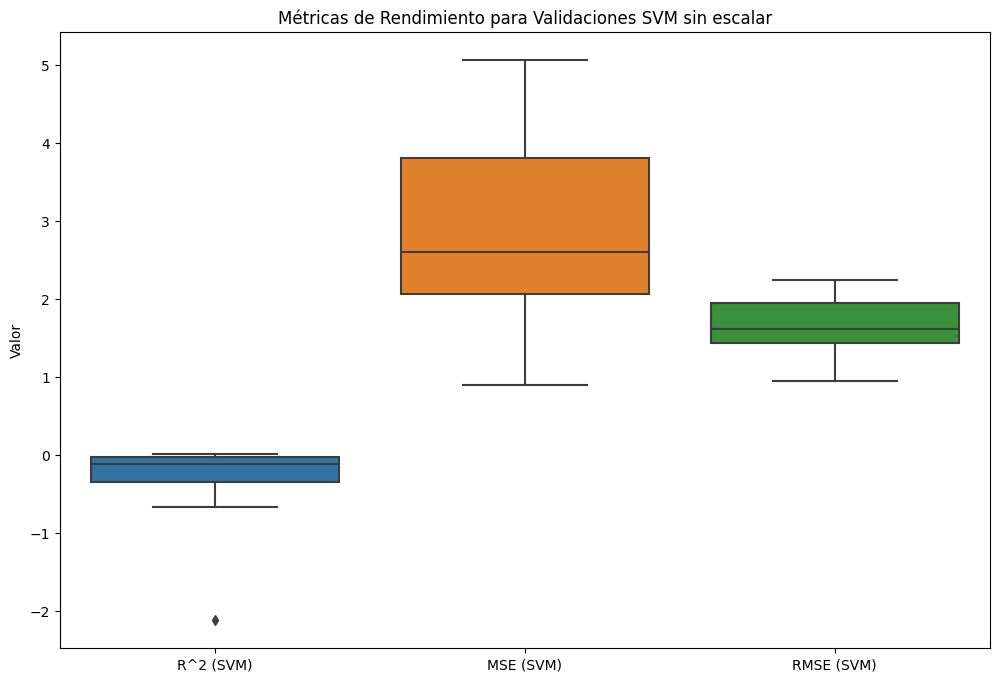

In [87]:
results_df_svm = pd.DataFrame({
    'R^2 (SVM)': r2_scores_svm,
    'MSE (SVM)': mse_scores_svm,
    'RMSE (SVM)': rmse_scores_svm
})
plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df_svm)
plt.title('Métricas de Rendimiento para Validaciones SVM sin escalar')
plt.ylabel('Valor')
plt.show()
mean_values_svm = results_df_svm.mean()
std_values_svm = results_df_svm.std()
summary_table_svm = pd.DataFrame({
    'Promedio SVM': mean_values_svm,
    'Desviación Estándar SVM': std_values_svm
})
summary_table_svm = summary_table_svm.round(4)



###Validación Random Forest no escalado

In [88]:
X = df2.drop('Y', axis=1)
y = df2['Y']
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring = {
    'r2': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y, y_pred: sqrt(mean_squared_error(y, y_pred)))
}
r2_scores_rf = cross_val_score(rf_model, X, y, cv=kf, scoring=scoring['r2'])
mse_scores_rf = cross_val_score(rf_model, X, y, cv=kf, scoring=scoring['mse'])
rmse_scores_rf = cross_val_score(rf_model, X, y, cv=kf, scoring=scoring['rmse'])
r2_mean_rf, r2_std_rf = np.mean(r2_scores_rf), np.std(r2_scores_rf)
mse_mean_rf, mse_std_rf = np.mean(mse_scores_rf), np.std(mse_scores_rf)
rmse_mean_rf, rmse_std_rf = np.mean(rmse_scores_rf), np.std(rmse_scores_rf)

print(f'R^2 (CV - Random Forest): Mean={r2_mean_rf:.4f}, Std={r2_std_rf:.4f}')
print(f'Mean Squared Error (MSE) (CV - Random Forest): Mean={mse_mean_rf:.4f}, Std={mse_std_rf:.4f}')
print(f'Root Mean Squared Error (RMSE) (CV - Random Forest): Mean={rmse_mean_rf:.4f}, Std={rmse_std_rf:.4f}')


R^2 (CV - Random Forest): Mean=-0.3899, Std=1.7650
Mean Squared Error (MSE) (CV - Random Forest): Mean=2.0084, Std=1.0233
Root Mean Squared Error (RMSE) (CV - Random Forest): Mean=1.3660, Std=0.3773


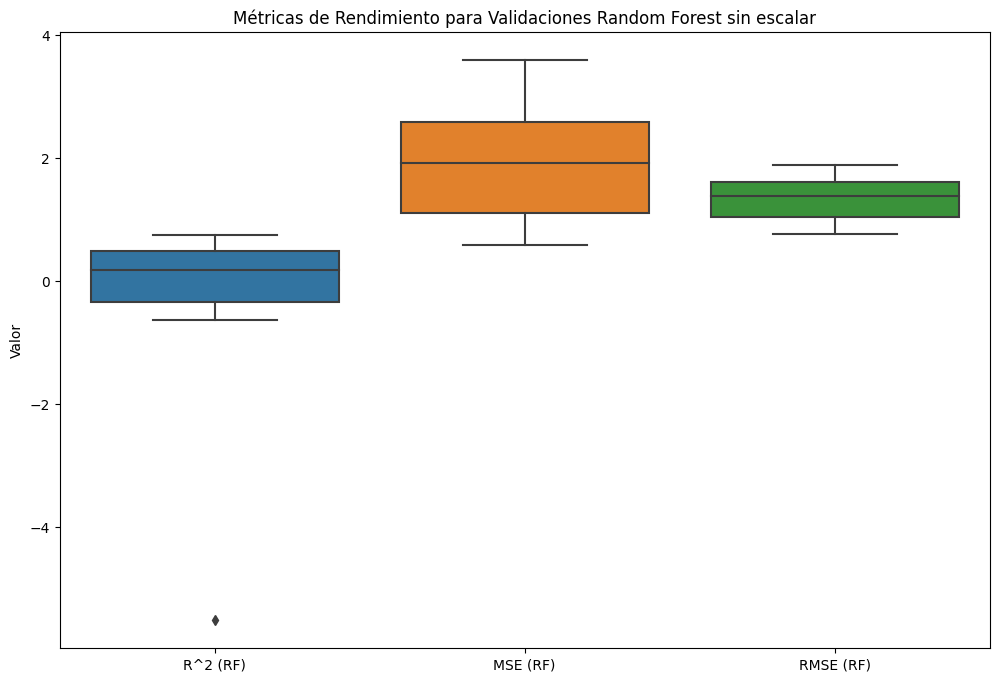

In [89]:
results_df_rf = pd.DataFrame({'R^2 (RF)': r2_scores_rf, 'MSE (RF)': mse_scores_rf, 'RMSE (RF)': rmse_scores_rf})
plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df_rf)
plt.title('Métricas de Rendimiento para Validaciones Random Forest sin escalar')
plt.ylabel('Valor')
plt.show()
summary_table_rf = pd.DataFrame({
    'Promedio RF': [r2_mean_rf, mse_mean_rf, rmse_mean_rf],
    'Desviación Estándar RF': [r2_std_rf, mse_std_rf, rmse_std_rf]
}, index=['R^2', 'MSE', 'RMSE'])

summary_table_rf = summary_table_rf.round(4)



###Validación SVM vs Random Forest no escalado

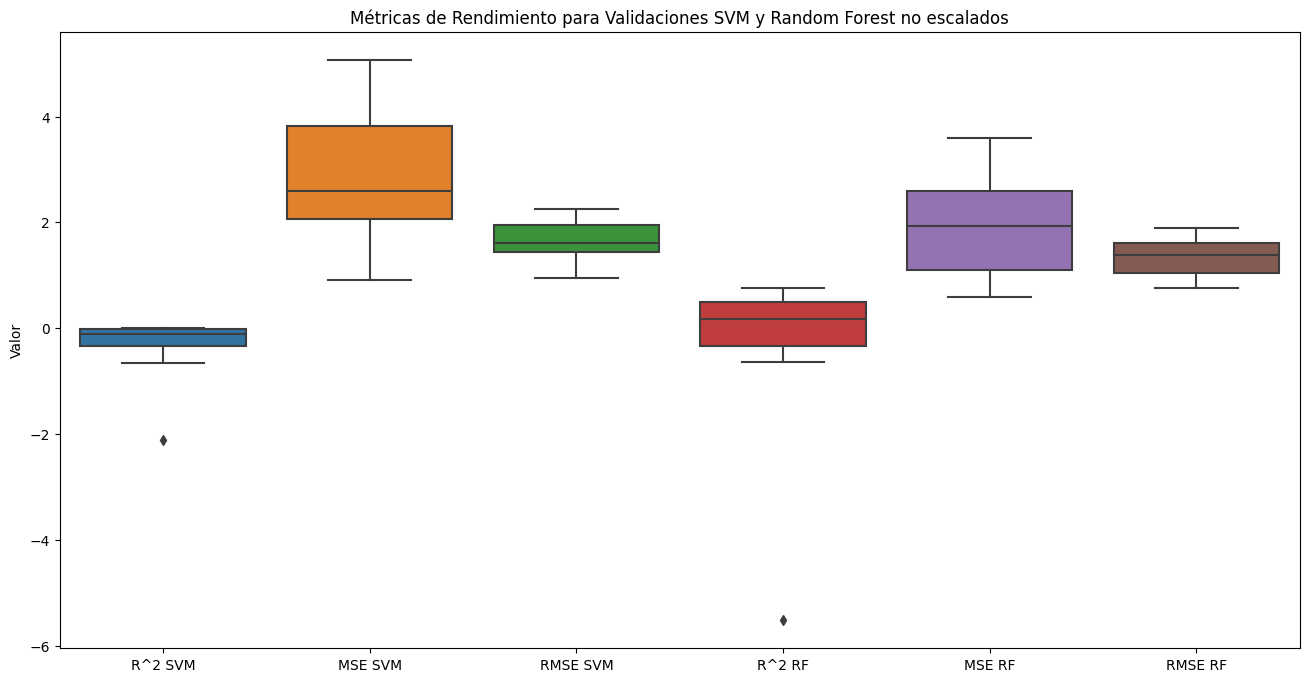

Tabla de Resumen de Métricas SVM:
            Promedio SVM  Desviación Estándar SVM
R^2 (SVM)        -0.3692                   0.6489
MSE (SVM)         2.9147                   1.4118
RMSE (SVM)        1.6582                   0.4285

Tabla de Resumen de Métricas Random Forest:
      Promedio RF  Desviación Estándar RF
R^2       -0.3899                  1.7650
MSE        2.0084                  1.0233
RMSE       1.3660                  0.3773


In [90]:
results_df_svm = pd.DataFrame({'R^2 SVM': r2_scores_svm, 'MSE SVM': mse_scores_svm, 'RMSE SVM': rmse_scores_svm})
results_df_rf = pd.DataFrame({'R^2 RF': r2_scores_rf, 'MSE RF': mse_scores_rf, 'RMSE RF': rmse_scores_rf})

combined_results_df = pd.concat([results_df_svm, results_df_rf], axis=1)

plt.figure(figsize=(16, 8))
sns.boxplot(data=combined_results_df)
plt.title('Métricas de Rendimiento para Validaciones SVM y Random Forest no escalados')
plt.ylabel('Valor')
plt.show()
summary_table_svm = pd.DataFrame({
    'Promedio SVM': mean_values_svm,
    'Desviación Estándar SVM': std_values_svm
})
summary_table_svm = summary_table_svm.round(4)

summary_table_rf = pd.DataFrame({
    'Promedio RF': [r2_mean_rf, mse_mean_rf, rmse_mean_rf],
    'Desviación Estándar RF': [r2_std_rf, mse_std_rf, rmse_std_rf]
}, index=['R^2', 'MSE', 'RMSE'])

summary_table_rf = summary_table_rf.round(4)
print("Tabla de Resumen de Métricas SVM:")
print(summary_table_svm)

print("\nTabla de Resumen de Métricas Random Forest:")
print(summary_table_rf)

